In [93]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
from sklearn.cluster import KMeans

In [94]:
data=pd.read_csv("student_evaluation.csv")

In [95]:
data.shape

(5820, 33)

In [96]:
data.head()

,instr,class,nb.repeat,attendance,difficulty,Q1,Q2,Q3,Q4,Q5,...,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28
0,1,2,1,0,4,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
1,1,2,1,1,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
2,1,2,1,2,4,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,5
3,1,2,1,1,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
4,1,2,1,0,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [97]:
data.columns

Index(['instr', 'class', 'nb.repeat', 'attendance', 'difficulty', 'Q1', 'Q2',
       'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8', 'Q9', 'Q10', 'Q11', 'Q12', 'Q13',
       'Q14', 'Q15', 'Q16', 'Q17', 'Q18', 'Q19', 'Q20', 'Q21', 'Q22', 'Q23',
       'Q24', 'Q25', 'Q26', 'Q27', 'Q28'],
      dtype='object')

In [98]:
data.isnull().sum()

instr         0
class         0
nb.repeat     0
attendance    0
difficulty    0
Q1            0
Q2            0
Q3            0
Q4            0
Q5            0
Q6            0
Q7            0
Q8            0
Q9            0
Q10           0
Q11           0
Q12           0
Q13           0
Q14           0
Q15           0
Q16           0
Q17           0
Q18           0
Q19           0
Q20           0
Q21           0
Q22           0
Q23           0
Q24           0
Q25           0
Q26           0
Q27           0
Q28           0
dtype: int64

In [99]:
data.describe()

,instr,class,nb.repeat,attendance,difficulty,Q1,Q2,Q3,Q4,Q5,...,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28
count,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,...,5820.000000,5820.000000,5820.000000,5820.000000,5820.00000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000
mean,2.485567,7.276289,1.214089,1.675601,2.783505,2.929897,3.073883,3.178694,3.082474,3.105842,...,3.261684,3.285395,3.307388,3.317526,3.20189,3.166838,3.312543,3.222165,3.154811,3.308076
std,0.718473,3.688175,0.532376,1.474975,1.348987,1.341077,1.285251,1.253567,1.284594,1.278989,...,1.268442,1.276848,1.269974,1.268358,1.27259,1.275909,1.257286,1.270695,1.291872,1.278709
min,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2.000000,4.000000,1.000000,0.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,...,3.000000,3.000000,3.000000,3.000000,2.00000,2.000000,3.000000,2.000000,2.000000,3.000000
50%,3.000000,7.000000,1.000000,1.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,...,3.000000,3.000000,3.000000,3.000000,3.00000,3.000000,3.000000,3.000000,3.000000,3.000000
75%,3.000000,10.000000,1.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,...,4.000000,4.000000,4.000000,4.000000,4.00000,4.000000,4.000000,4.000000,4.000000,4.000000
max,3.000000,13.000000,3.000000,4.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.00000,5.000000,5.000000,5.000000,5.000000,5.000000


In [100]:
Kmeans = KMeans(n_clusters=2)

In [101]:
Kmeans.fit(data)

KMeans(n_clusters=2)

In [102]:
pred=Kmeans.predict(data)

In [103]:
pred

array([1, 1, 0, ..., 0, 1, 1])

In [104]:
pd.Series(pred).value_counts()

1    3148
0    2672
dtype: int64

In [105]:
Kmeans.inertia_

231353.86109925815

In [106]:
Kmeans.score(data)

-231353.86109925818

In [107]:
SSE = []

In [108]:
for cluster in range(1,20):
    Kmeans = KMeans(n_jobs = -1, n_clusters = cluster)
    Kmeans.fit(data)
    SSE.append(Kmeans.inertia_)

In [109]:
frame = pd.DataFrame({'Cluster':range(1,20), 'SSE':SSE})

Text(0, 0.5, 'Inertia')

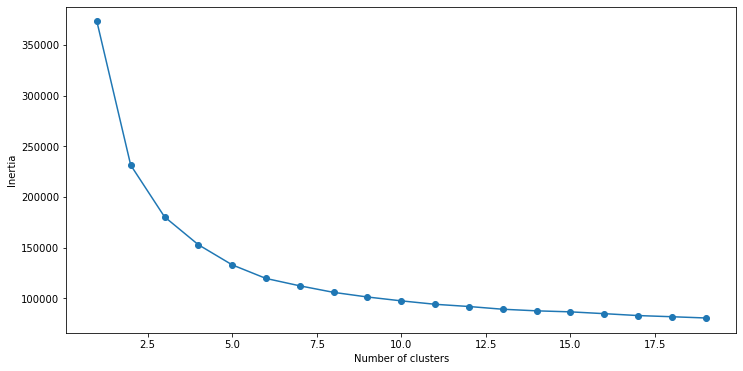

In [110]:
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

In [111]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

data_scaled = scaler.fit_transform(data)

In [112]:
pd.DataFrame(data_scaled).describe()

,0,1,2,3,4,5,6,7,8,9,...,23,24,25,26,27,28,29,30,31,32
count,5.820000e+03,5.820000e+03,5.820000e+03,5.820000e+03,5.820000e+03,5.820000e+03,5.820000e+03,5.820000e+03,5.820000e+03,5.820000e+03,...,5.820000e+03,5.820000e+03,5.820000e+03,5.820000e+03,5.820000e+03,5.820000e+03,5.820000e+03,5.820000e+03,5.820000e+03,5.820000e+03
mean,1.562706e-16,9.766910e-17,2.051051e-16,-6.592665e-17,4.028851e-17,1.269698e-16,-1.660375e-16,1.465037e-16,-1.172029e-16,-1.953382e-17,...,7.325183e-17,8.790219e-17,1.855713e-16,-1.562706e-16,-1.269698e-16,1.172029e-16,-2.051051e-16,-8.301874e-17,8.301874e-17,1.709209e-16
std,1.000086e+00,1.000086e+00,1.000086e+00,1.000086e+00,1.000086e+00,1.000086e+00,1.000086e+00,1.000086e+00,1.000086e+00,1.000086e+00,...,1.000086e+00,1.000086e+00,1.000086e+00,1.000086e+00,1.000086e+00,1.000086e+00,1.000086e+00,1.000086e+00,1.000086e+00,1.000086e+00
min,-2.067850e+00,-1.701879e+00,-4.021740e-01,-1.136118e+00,-1.322221e+00,-1.439189e+00,-1.613740e+00,-1.738145e+00,-1.621254e+00,-1.646630e+00,...,-1.783194e+00,-1.790026e+00,-1.817034e+00,-1.827343e+00,-1.730392e+00,-1.698417e+00,-1.839472e+00,-1.748929e+00,-1.668120e+00,-1.805160e+00
25%,-6.758900e-01,-8.883988e-01,-4.021740e-01,-1.136118e+00,-1.322221e+00,-6.934552e-01,-8.356154e-01,-9.403527e-01,-8.427308e-01,-8.646959e-01,...,-2.063210e-01,-2.235345e-01,-2.420638e-01,-2.503655e-01,-9.445255e-01,-9.145943e-01,-2.486068e-01,-9.618909e-01,-8.939823e-01,-2.409479e-01
50%,7.160704e-01,-7.491846e-02,-4.021740e-01,-4.580819e-01,1.605008e-01,5.227822e-02,-5.749034e-02,-1.425608e-01,-6.420806e-02,-8.276145e-02,...,-2.063210e-01,-2.235345e-01,-2.420638e-01,-2.503655e-01,-1.586587e-01,-1.307718e-01,-2.486068e-01,-1.748524e-01,-1.198450e-01,-2.409479e-01
75%,7.160704e-01,7.385619e-01,-4.021740e-01,8.979896e-01,9.018615e-01,7.980117e-01,7.206347e-01,6.552312e-01,7.143147e-01,6.991730e-01,...,5.821153e-01,5.597111e-01,5.454215e-01,5.381232e-01,6.272081e-01,6.530507e-01,5.468257e-01,6.121861e-01,6.542923e-01,5.411584e-01
max,7.160704e-01,1.552042e+00,3.354893e+00,1.576025e+00,1.643222e+00,1.543745e+00,1.498760e+00,1.453023e+00,1.492837e+00,1.481107e+00,...,1.370552e+00,1.342957e+00,1.332907e+00,1.326612e+00,1.413075e+00,1.436873e+00,1.342258e+00,1.399225e+00,1.428430e+00,1.323265e+00


In [113]:
SSE_scaled = []

In [114]:
for cluster in range(1,20):
    Kmeans = KMeans(n_jobs = -1, n_clusters = cluster)
    Kmeans.fit(data_scaled)
    SSE_scaled.append(Kmeans.inertia_)

Text(0, 0.5, 'SSE')

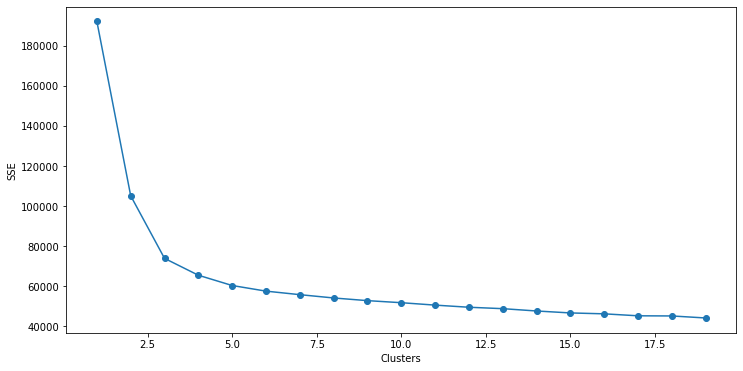

In [115]:
plt.figure(figsize=(12,6))
frame_scaled = pd.DataFrame({'Cluster':range(1,20), 'SSE':SSE_scaled})
plt.plot(frame_scaled['Cluster'], frame_scaled['SSE'], marker='o')
plt.xlabel("Clusters")
plt.ylabel("SSE")

In [116]:
Kmeans = KMeans(n_jobs = -1, n_clusters = 4)
Kmeans.fit(data_scaled)
pred = Kmeans.predict(data_scaled)

In [117]:
pred

array([2, 2, 3, ..., 3, 0, 0])

In [118]:
frame = pd.DataFrame(data_scaled)

In [119]:
frame['cluster'] = pred

In [120]:
frame['cluster'].value_counts()

2    2101
1    1666
0    1199
3     854
Name: cluster, dtype: int64

In [121]:
frame.head()

,0,1,2,3,4,5,6,7,8,9,...,24,25,26,27,28,29,30,31,32,cluster
0,-2.06785,-1.430719,-0.402174,-1.136118,0.901862,0.052278,-0.05749,-0.142561,-0.064208,-0.082761,...,-0.223535,-0.242064,-0.250365,-0.158659,-0.130772,-0.248607,-0.174852,-0.119845,-0.240948,2
1,-2.06785,-1.430719,-0.402174,-0.458082,0.160501,0.052278,-0.05749,-0.142561,-0.064208,-0.082761,...,-0.223535,-0.242064,-0.250365,-0.158659,-0.130772,-0.248607,-0.174852,-0.119845,-0.240948,2
2,-2.06785,-1.430719,-0.402174,0.219954,0.901862,1.543745,1.49876,1.453023,1.492837,1.481107,...,1.342957,1.332907,1.326612,1.413075,1.436873,1.342258,1.399225,1.428430,1.323265,3
3,-2.06785,-1.430719,-0.402174,-0.458082,0.160501,0.052278,-0.05749,-0.142561,-0.064208,-0.082761,...,-0.223535,-0.242064,-0.250365,-0.158659,-0.130772,-0.248607,-0.174852,-0.119845,-0.240948,2
4,-2.06785,-1.430719,-0.402174,-1.136118,-1.322221,-1.439189,-1.61374,-1.738145,-1.621254,-1.646630,...,-1.790026,-1.817034,-1.827343,-1.730392,-1.698417,-1.839472,-1.748929,-1.668120,-1.805160,0
